#  Analysis Report: The relationship between population changes and the number of private cars in the city of Münster.



## Contents
1. Introduction

2. Data Source

3. Data Analysis

4. Conclusion

## 1.Introduction
This report investigates the relationship between the population changes, including the male population, female population, population aged 0-19, population aged 20-39, population aged 40-59, population aged 60-79, population aged 80 and above, population of other nationalities, population of German nationality, financially incapable young population, working-age population, and elderly population, in the city of Münster from 2018 to 2022, and the number of private cars in Münster.

Question: 

1. Is the population change related to number of private cars?

2. Which population group is most correlated with the number of private cars, and what conclusions can be drawn from the analysis?

## 2.Data Source
Data source 1 ：Mobilithek

Vehicle census in Münster from 2018 to 2022, including all motor vehicles and motor vehicle trailers registered with the Central Vehicle Registry Office (ZFZR) as of January 1st of each year.

Data source 2 ：opendata.stadt-muenster

File 1: Population Changes in Münster from 1999 to 2022 - Gender Perspective

File 2: Population Changes in Münster from 1999 to 2022 - Age Perspective

File 3: Population Changes in Münster from 1999 to 2022 - Nationality Perspective

## 3.Data Analysis

### 3.1. Install dependencies

In [91]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 3.2. Load data
Create a pandas dataframe using the local sqlite file. Apply a lambda function to all elements in a DataFrame and convert the result to integer type.

Divide the data into three groups for analysis:

1. Gender

2. Age

3. Nationality

For the age group, since the age groups are too fine-grained, I will combine different age groups into "financially incapable young population," "working-age population," and "elderly population." When conducting correlation analysis, we will use the Pearson coefficient. The analysis of the age groups will primarily focus on these three groups, while the other age data will be considered for reference.


In [92]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df = pd.read_sql_table('data_need', 'sqlite:///data/mydatabase.sqlite')
df = df.applymap(lambda x: int(x))
df = pd.DataFrame(df)
df['Financially incapable youth'] = df[' 0 bis 19 Jahre_wert']
df['Working-age population'] = df[' 20 bis 39 Jahre_wert']+df[' 40 bis 59 Jahre_wert']
df['Aging population'] = df[' 60 bis 79 Jahre_wert']+df[' 80 und mehr Jahre_wert']

df

,ZEIT,passenger_carsnumber,man_wert,woman_wert,0 bis 19 Jahre_wert,20 bis 39 Jahre_wert,40 bis 59 Jahre_wert,60 bis 79 Jahre_wert,80 und mehr Jahre_wert,foreign_wert,german_wert,Financially incapable youth,Working-age population,Aging population
0,2018,143295,149211,161399,54738,105150,79909,53419,17394,33110,277500,54738,185059,70813
1,2019,145681,149965,162204,54770,105956,79169,54096,18178,33884,278285,54770,185125,72274
2,2020,147332,150586,162383,54544,105981,78689,54847,18908,34140,278829,54544,184670,73755
3,2021,150277,151115,163217,54687,106574,77982,55679,19410,35120,279212,54687,184556,75089
4,2022,151531,153295,166146,56054,108719,77941,57279,19448,39514,279927,56054,186660,76727


### 3.3 Creat plot and Data Analysis



Plot 3.3.1 The number of private cars and the male population

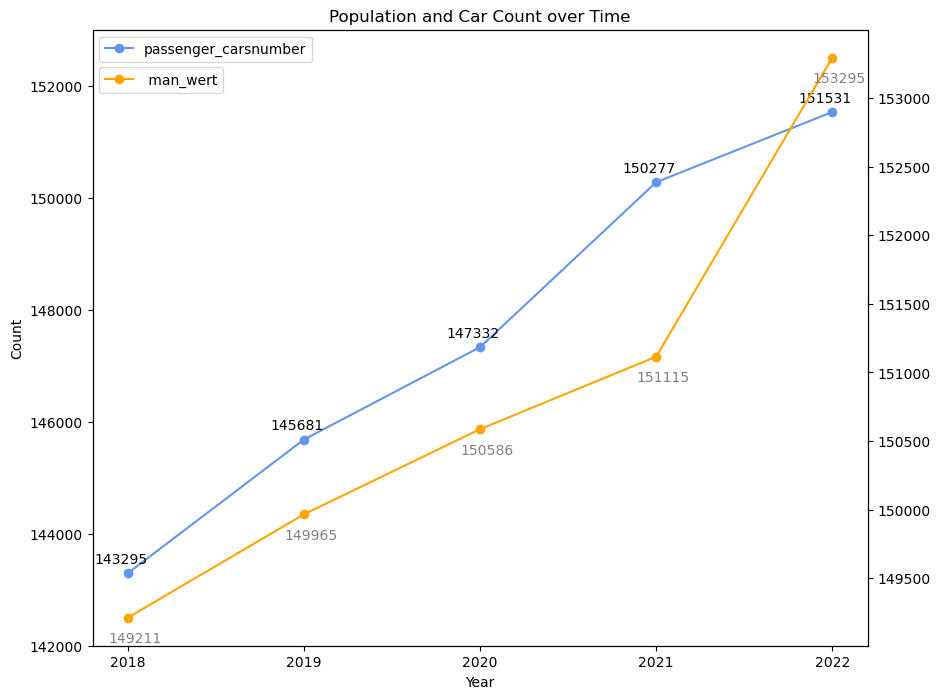

In [109]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000),xlabel = 'Year')
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' man_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange')
for i, row in df.iterrows():
    plt.annotate(row[' man_wert'], (row['ZEIT'], row[' man_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))

plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.2 The number of private cars and the female population

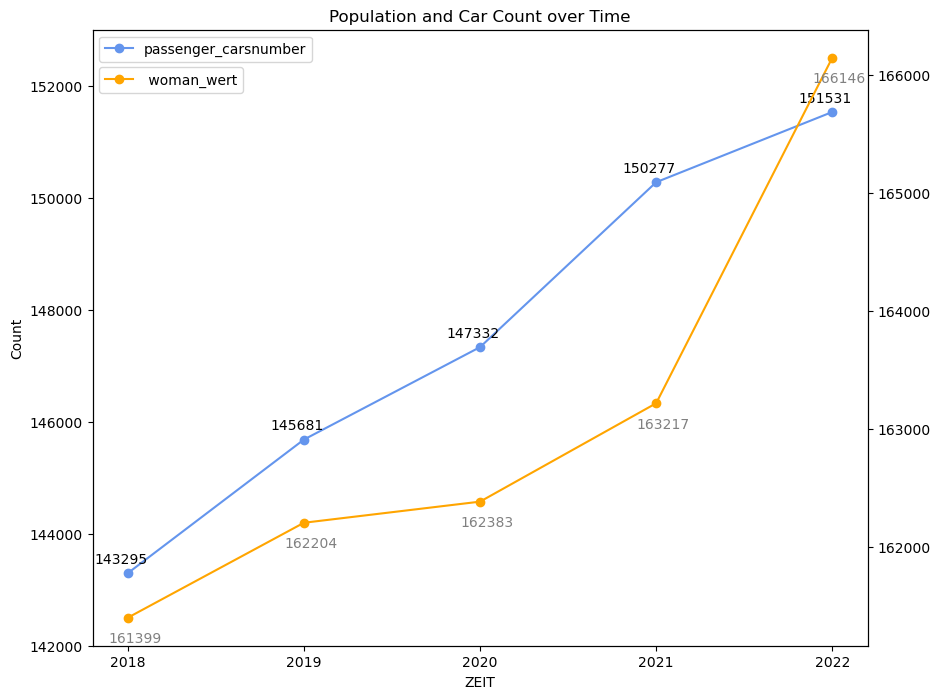

In [94]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' woman_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange')
for i, row in df.iterrows():
    plt.annotate(row[' woman_wert'], (row['ZEIT'], row[' woman_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.3 The number of private cars and the population aged 0-19

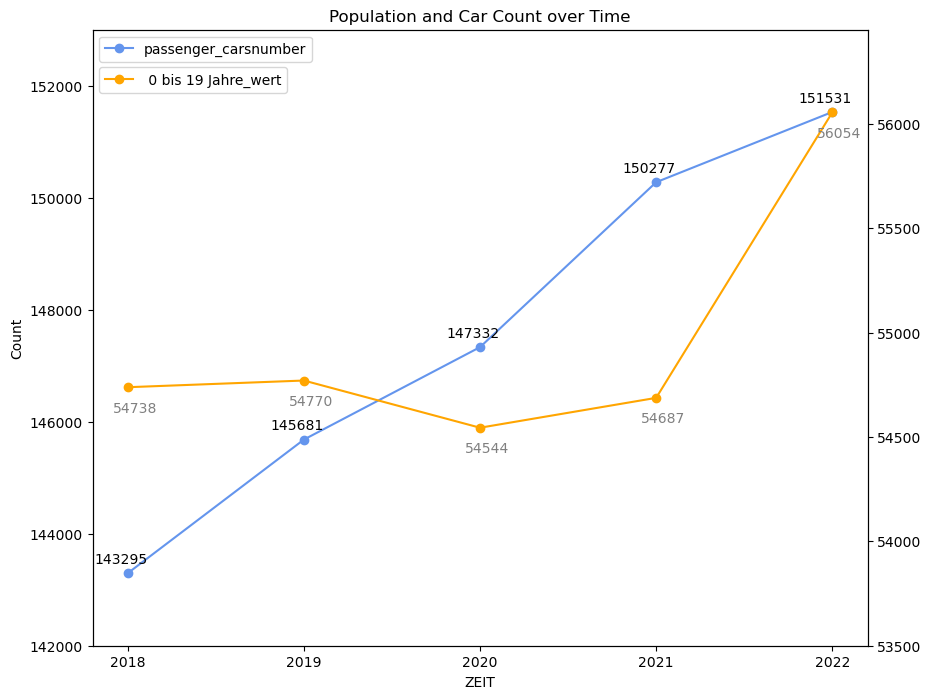

In [95]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' 0 bis 19 Jahre_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange',ylim = (53500,56450))
for i, row in df.iterrows():
    plt.annotate(row[' 0 bis 19 Jahre_wert'], (row['ZEIT'], row[' 0 bis 19 Jahre_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.4 The number of private cars and the population aged 20-39

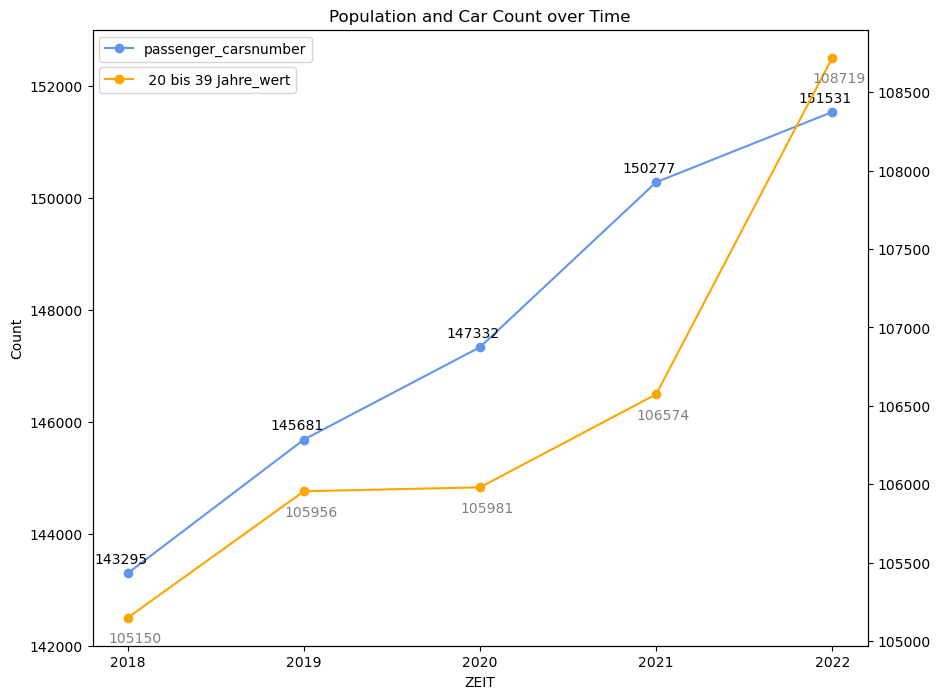

In [96]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' 20 bis 39 Jahre_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange')
for i, row in df.iterrows():
    plt.annotate(row[' 20 bis 39 Jahre_wert'], (row['ZEIT'], row[' 20 bis 39 Jahre_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.5 The number of private cars and the population aged 40-59

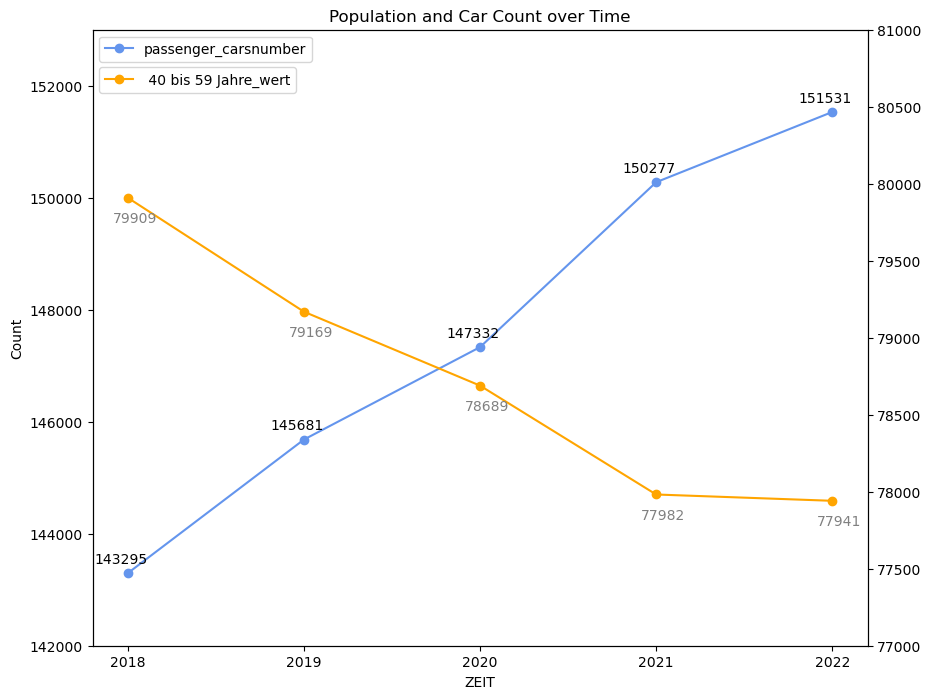

In [97]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' 40 bis 59 Jahre_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange',ylim = (77000,81000))
for i, row in df.iterrows():
    plt.annotate(row[' 40 bis 59 Jahre_wert'], (row['ZEIT'], row[' 40 bis 59 Jahre_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.6 The number of private cars and the population aged 60-79

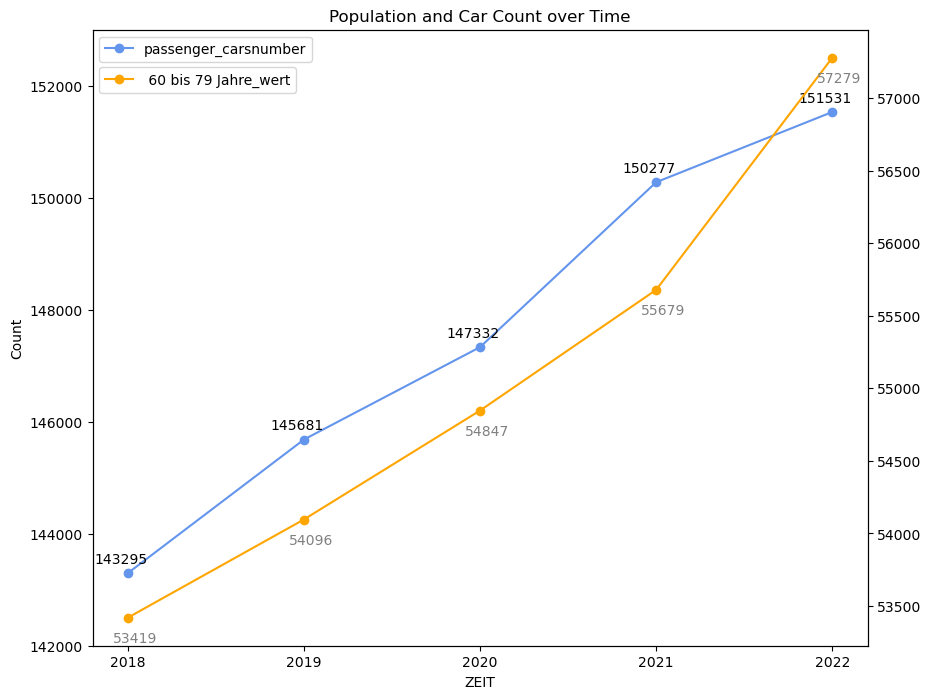

In [98]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' 60 bis 79 Jahre_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange')
for i, row in df.iterrows():
    plt.annotate(row[' 60 bis 79 Jahre_wert'], (row['ZEIT'], row[' 60 bis 79 Jahre_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.7 The number of private cars and the population aged 80 and above

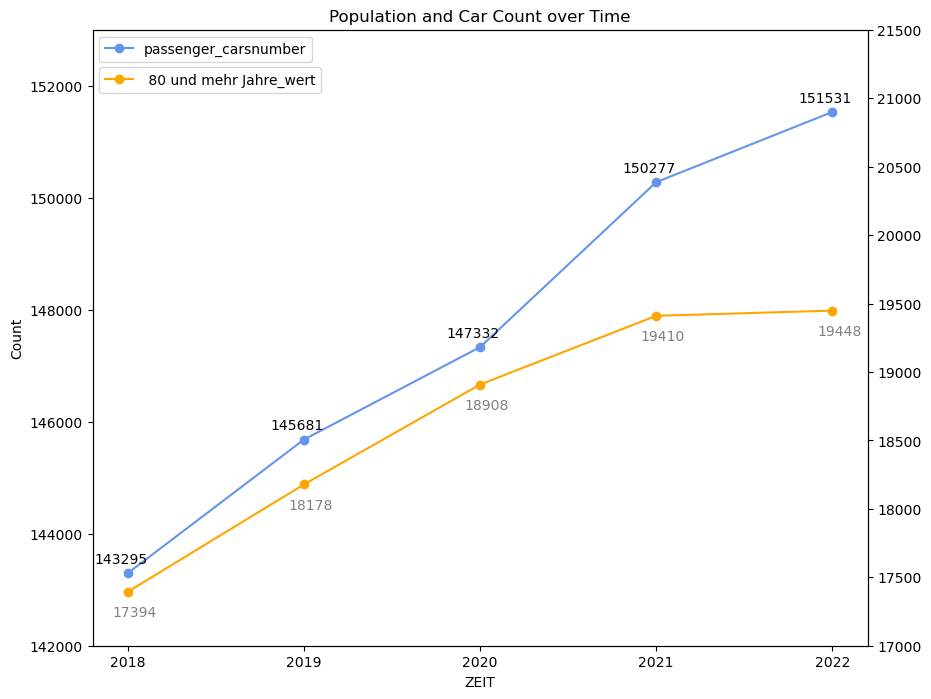

In [99]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y=' 80 und mehr Jahre_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange',ylim = (17000,21500))
for i, row in df.iterrows():
    plt.annotate(row[' 80 und mehr Jahre_wert'], (row['ZEIT'], row[' 80 und mehr Jahre_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.8 The number of private cars and the population of foreign nationalities

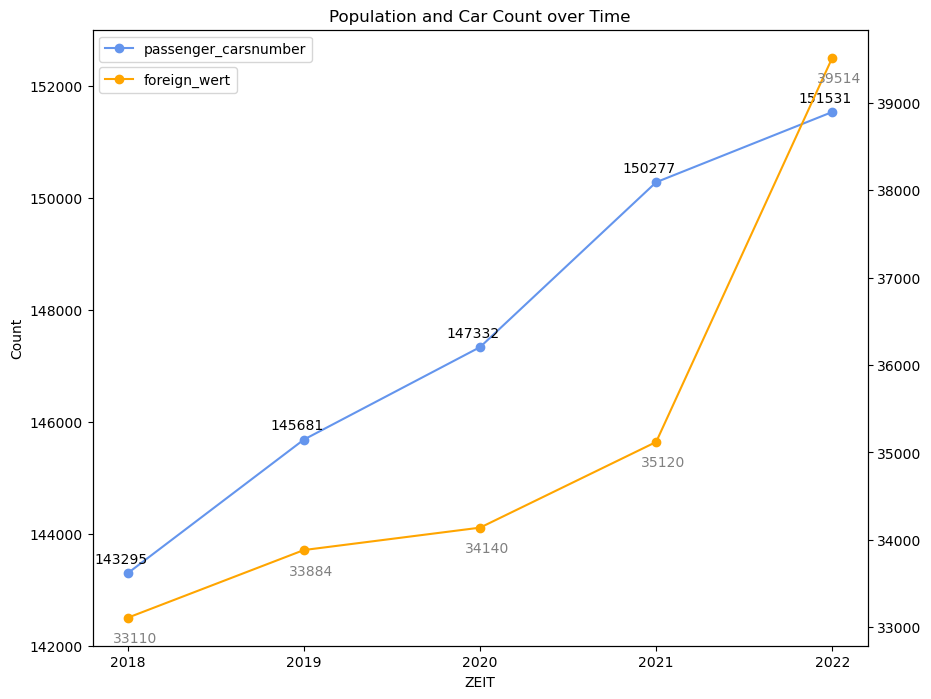

In [100]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y='foreign_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange')
for i, row in df.iterrows():
    plt.annotate(row['foreign_wert'], (row['ZEIT'], row['foreign_wert']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.9 The number of private cars and the population of German nationality

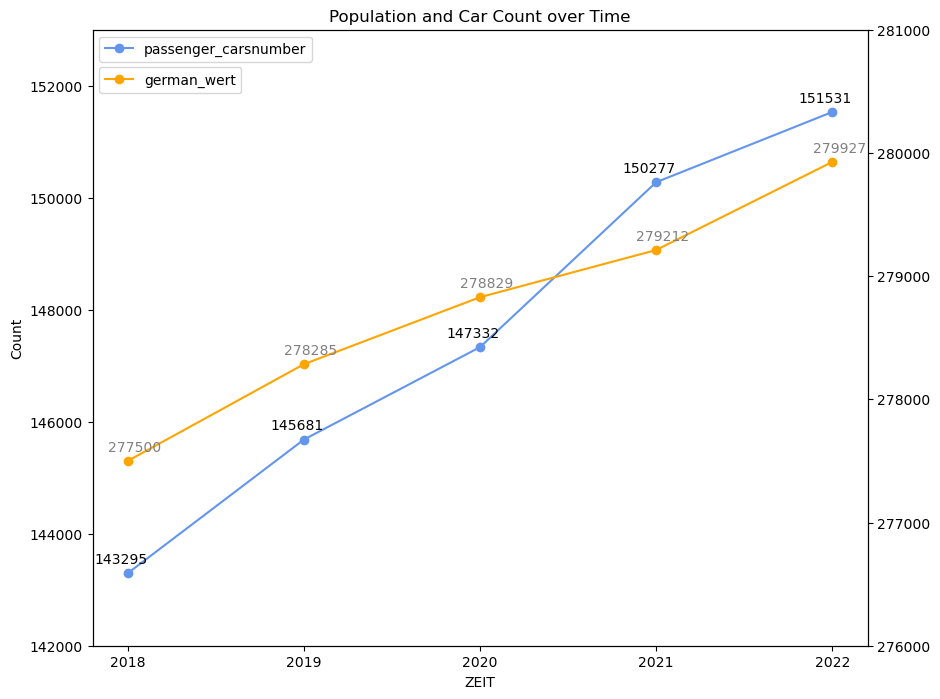

In [101]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y='german_wert', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange',ylim=(276000,281000))
for i, row in df.iterrows():
    plt.annotate(row['german_wert'], (row['ZEIT'], row['german_wert']), xytext=(5, 15), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.10 The number of private cars and the population of Financially incapable youth

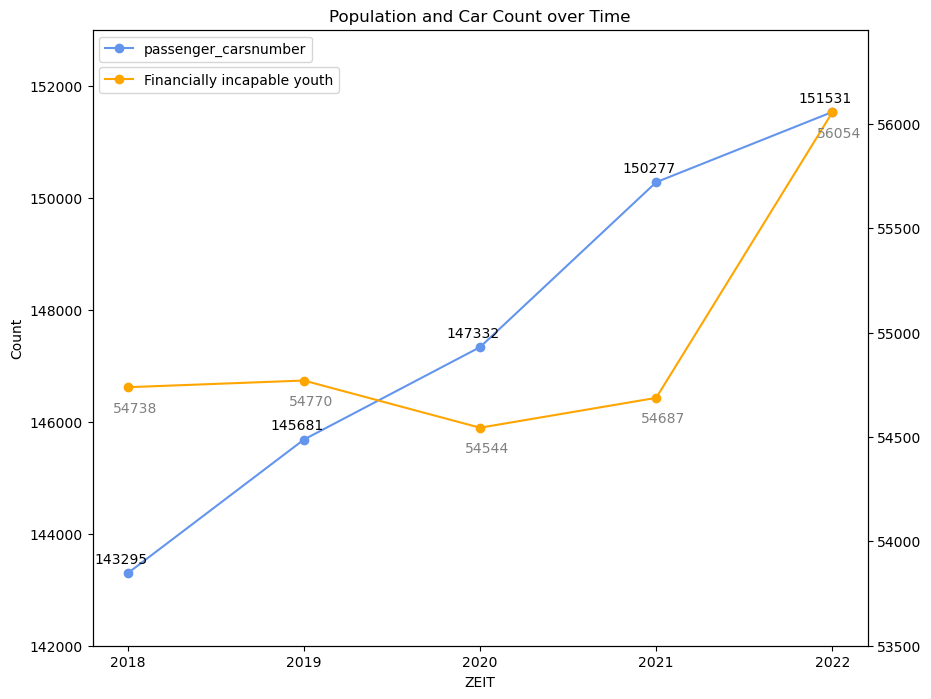

In [102]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y='Financially incapable youth', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange',ylim = (53500,56450))
for i, row in df.iterrows():
    plt.annotate(row['Financially incapable youth'], (row['ZEIT'], row['Financially incapable youth']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.11 The number of private cars and the Working-age population

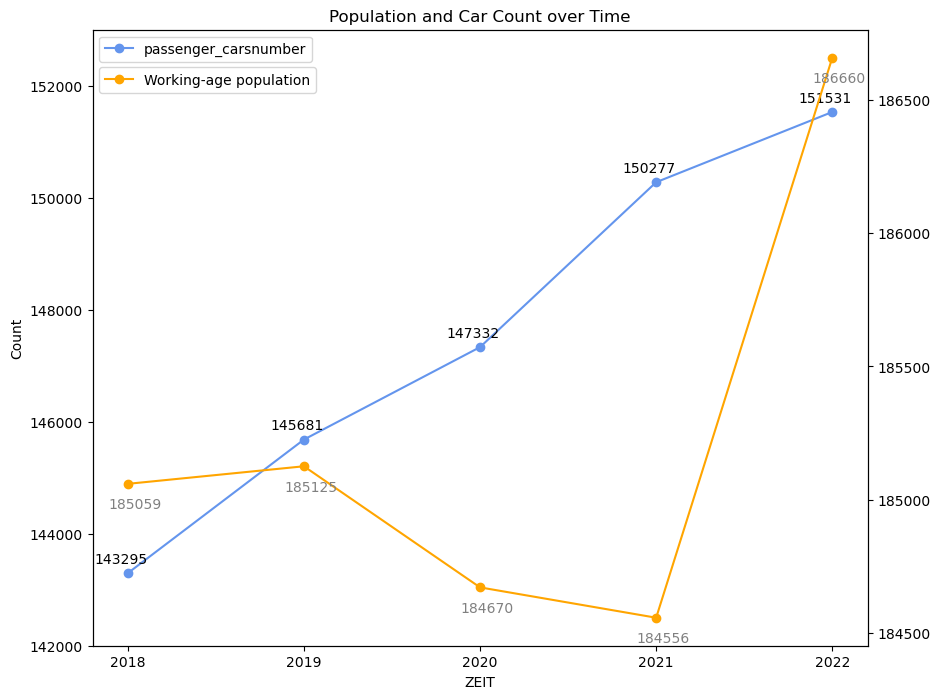

In [103]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y='Working-age population', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange')
for i, row in df.iterrows():
    plt.annotate(row['Working-age population'], (row['ZEIT'], row['Working-age population']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.12 The number of private cars and the Aging population

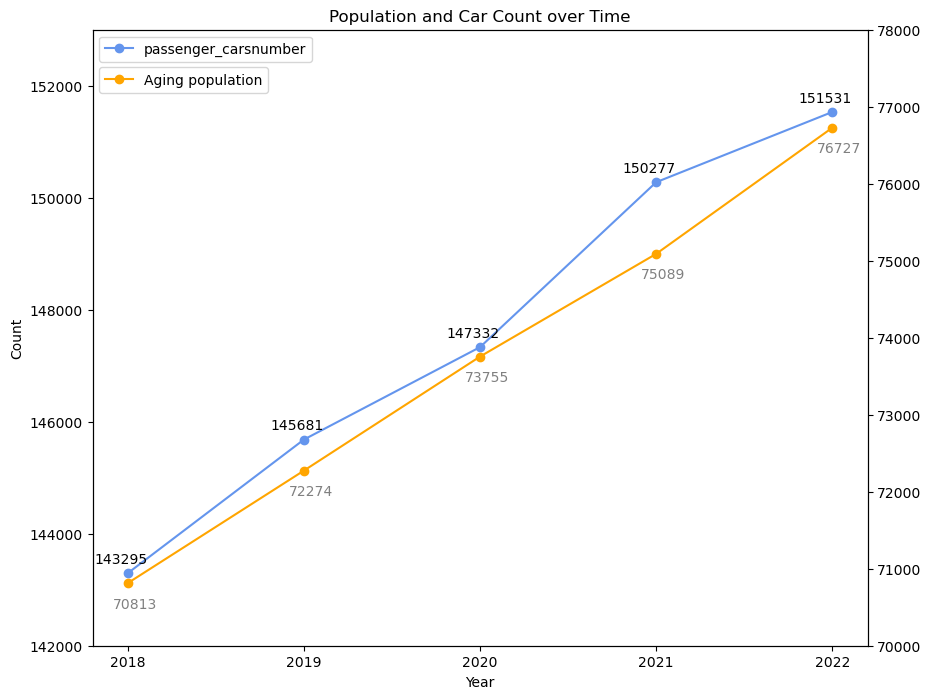

In [108]:
fig, ax1 = plt.subplots()
df.plot(x='ZEIT', y='passenger_carsnumber', ax = ax1,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'cornflowerblue',ylim = (142000,153000))
for i, row in df.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['ZEIT'], row['passenger_carsnumber']), xytext=(-5, 15), textcoords='offset points',va = 'top',ha = 'center')
plt.ylabel('Count')
ax2 = ax1.twinx()
df.plot(x='ZEIT', y='Aging population', ax = ax2,marker='o',xticks=df['ZEIT'],figsize=(10,8),color = 'orange',ylim = (70000,78000),xlabel = 'Year')
for i, row in df.iterrows():
    plt.annotate(row['Aging population'], (row['ZEIT'], row['Aging population']), xytext=(5, -10), textcoords='offset points',va = 'top',ha = 'center',color = 'gray')

plt.xlabel('Year')
legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
legend2 = ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))


plt.title('Population and Car Count over Time')

plt.show()

Plot 3.3.13 The number of private cars and the data of population

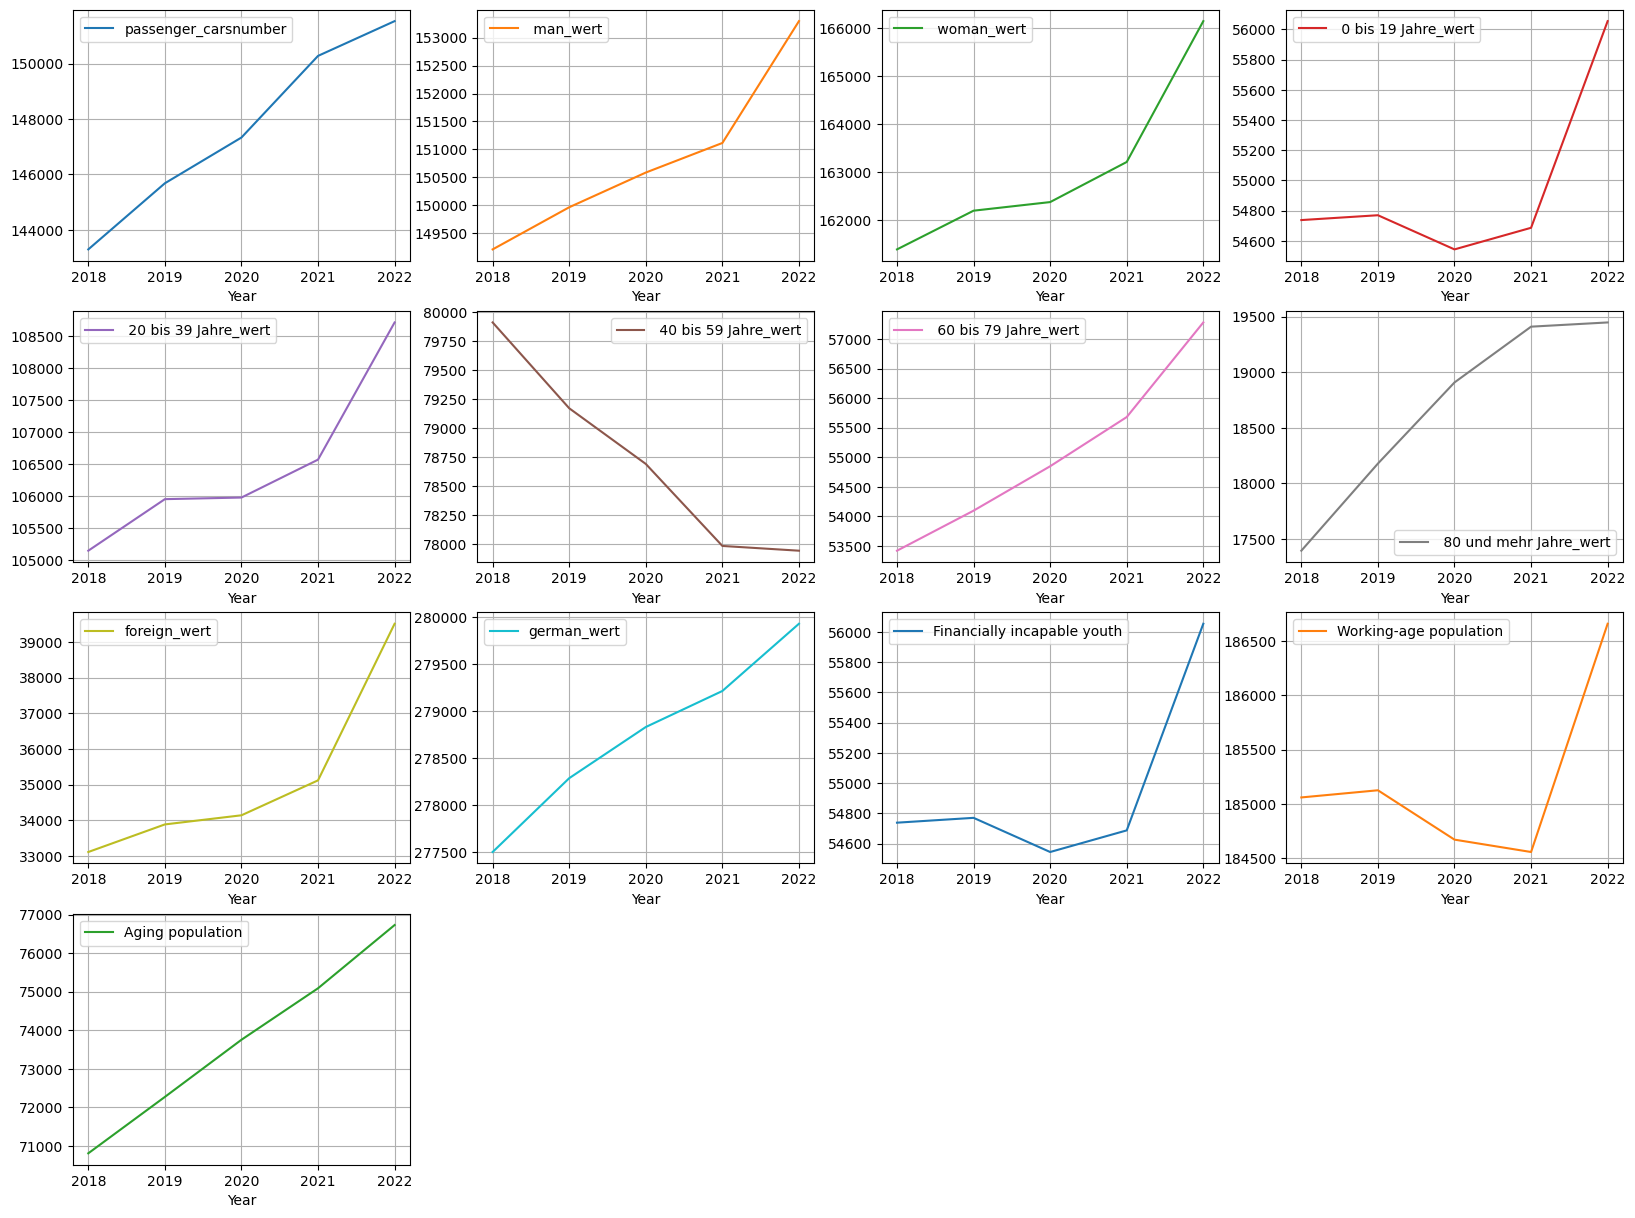

In [105]:
df.plot(subplots=True,x = 'ZEIT', layout=(4, 4), figsize=(20, 15), sharex=False,kind = 'line',rot = 0,legend = True,grid = True,xlabel= 'Year')
plt.show()


We can observe that:

·In the gender group, the curve shape of the male population is closer to the curve of the vehicle quantity compared to the female population.

·In the age group, the curve shape of the aging population is closer to the curve of the vehicle quantity compared to other age groups.

·In the nationality group, the curve shape of the population with German nationality is closer to the curve of the vehicle quantity compared to the population of foreign nationalities.

### 3.4 Calculate the correlation between the number of private cars and population groups

In [106]:
df_without_year = df.drop('ZEIT', axis=1)
correlation_matrix = df_without_year.corr()
vehicle_corr = correlation_matrix['passenger_carsnumber'].drop('passenger_carsnumber')
vehicle_corr = pd.DataFrame(vehicle_corr)
print("Correlation with VehicleCount:")
print(vehicle_corr)

Correlation with VehicleCount:
                             passenger_carsnumber
 man_wert                                0.922879
 woman_wert                              0.874324
 0 bis 19 Jahre_wert                     0.603471
 20 bis 39 Jahre_wert                    0.878363
 40 bis 59 Jahre_wert                   -0.988062
 60 bis 79 Jahre_wert                    0.963950
 80 und mehr Jahre_wert                  0.970523
foreign_wert                             0.838500
german_wert                              0.982915
Financially incapable youth              0.603471
Working-age population                   0.433595
Aging population                         0.991071


Plot 3.4.1 The correlation between the number of private cars and population groups

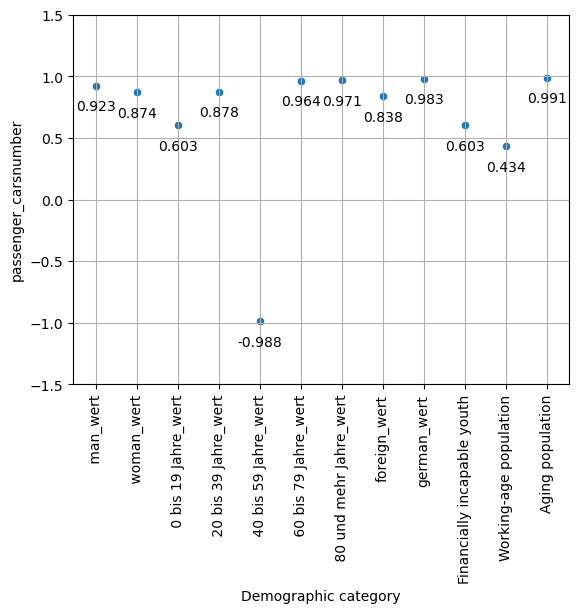

In [107]:
corr_index = vehicle_corr.reset_index()
corr_index = corr_index.round(3)
# vehicle_corr
corr_index.plot(x='index', y='passenger_carsnumber',kind = 'scatter',xlabel='Demographic category',grid = True,ylim=(-1.5,1.5))
for i, row in corr_index.iterrows():
    plt.annotate(row['passenger_carsnumber'], (row['index'], row['passenger_carsnumber']), xytext=(0, -10), textcoords='offset points',va = 'top',ha = 'center')
plt.xticks(rotation=90)
plt.show()

Through the correlation calculation, we can indeed observe that the Pearson coefficients for the male population, aging population, and the population with German nationality are closest to 1. The Pearson coefficient for the aging population may even be as high as 0.991, indicating a strong positive correlation with the number of private cars. This suggests that the number of private cars is highly correlated with the male population, aging population, and the population with German nationality in Münster.

## 4. Conclusion

Based on the analysis and correlation calculations, we can draw the following conclusions:

Question: 

1. Is the population change related to number of private cars?

Yes, the population change can be related to the number of private cars. As the population increases, there is often a corresponding increase in the number of private cars owned by individuals. 

When the population grows, there is typically an increased demand for transportation services, including private cars. People may require cars for commuting to work, running errands, or leisure activities. As a result, the number of private cars tends to rise.

However, it's important to note that the relationship between population change and the number of private cars is not solely deterministic. Other factors, such as the availability of public transportation options, urban planning strategies, government policies, and cultural preferences, can also influence car ownership patterns within a population.

2. Which population group is most correlated with the number of private cars, and what conclusions can be drawn from the analysis?

1. Gender: The number of private cars in Münster is more closely correlated with the male population compared to the female population. There is a stronger positive correlation between the number of private cars and the male population.

2. Age: Among the different age groups, the aging population (60-79 years) shows the closest correlation with the number of private cars. There is a strong positive correlation between the number of private cars and the aging population.

3. Nationality: The population with German nationality exhibits a closer correlation with the number of private cars compared to the population of foreign nationalities. There is a stronger positive correlation between the number of private cars and the population with German nationality.

These findings suggest that factors such as gender (male), age group (aging population), and nationality (German) have a significant influence on the number of private cars in Münster. Further analysis and investigation can provide insights into the underlying reasons behind these correlations.

However, this does not mean that elderly German men are more inclined to buy cars.

Shortcoming: 

1. Lack of data, as I only used data from 2018 to 2022. Although population data is available from 1999 to 2022, unfortunately, I only obtained vehicle data for the years 2018 to 2022. Therefore, to match the available data, I had to choose a 5-year period for analysis.

2. In fact, many age groups have high Pearson correlation coefficients, indicating the need for more data for analysis. While it is true that as people age, they may be more inclined to own private cars to fulfill their transportation and independence needs, it is important to note that the increase in the elderly population may be correlated with the increase in the number of private cars. However, it is also known that the working-age population has a need for family vehicles and commuting by car to work. Additionally, the working-age population is in the age range where they are actively creating value and earning income. Intuitively, one might expect this age group to have the highest correlation (although the results may not support this assumption). However, it is important to consider the decrease in the population of the 40-59 age group, which could be related to the aging of the post-World War II baby boom generation in Germany. This demographic decline in the 40-59 age group may have an impact on the overall correlation between age groups and the number of private cars. Therefore, further analysis and consideration of other factors are necessary to fully understand the complex relationship between age groups and the number of private cars.

3. I do not believe that the demand for private cars is inherently related to gender.

So to obtain more accurate and comprehensive conclusions, it is necessary to have data from additional years, reliable data sources, consider other key variables, and conduct more detailed analysis on segmented population groups.